In [1]:
import src.ntd.utils as utils
import examples
import experiments_for_paper


# Experiments from paper

In this notebook, we briefly illustrate the numerical performance of the Normal-Tangent Descent method (NTD) [0]. In the experiments, we compare NTD to the subgradient method with the popular Polyak stepsize, which iterates
$$
x_{k+1} = x_k - \frac{f(x_k) - \inf f}{\|w_k\|^2} w_k \qquad \text{for some $w_k \in \partial f(x_k).$}
$$
In the first two examples, $\inf f$ is known, in the third, we estimate $\inf f$ from multiple runs of NTD.
We compare against the subgradient method because it is a simple first-order method with strong convergence guarantees in convex and nonconvex settings. Importantly, the Polyak method accesses the objective solely through function and subgradient evaluations. Thus, we compare the accuracy achieved by Polyak and NTD after a fixed number of oracle calls, i.e., evaluations of $\partial f$.

[0] https://arxiv.org/abs/2205.00064

# What problem is NTD solving?

Slow sublinear convergence of first-order methods in nonsmooth optimization is often illustrated with the following simple strongly convex function:
\begin{align}
f(x) = \max_{1 \leq i \leq m} x_i + \frac{1}{2}\|x\|^2 \qquad \text{for some $m \leq d$ and all $x \in \mathbb{R}^d$}.
\end{align}
For example, consider the subgradient method applied to $f$, which generates iterates $x_k.$ Since $f$ is strongly convex, classical results dictate that $f(x_k) - \inf f = O(k^{-1})$. On the other hand, under proper initialization and an adversarial first-order oracle, there is a matching lower bound for the first $m$ iterations: $f(x_k) - \inf f \geq (2k)^{-1} $ for all $k \leq m$; see Theorem 3.13 of [0]. Beyond the subgradient method, the lower bound also holds for any algorithm  whose $k$th iterate lies within the linear span of the initial iterate and past $k-1$ computed subgradients. Thus, one must make more than $m$ first-order oracle calls to $f$, i.e., function and subgradient evaluations, before possibly seeing improved convergence behavior.


While such methods make little progress when $k \leq m$, this behavior may or may not continue for $k \gg m$. On one extreme, the subgradient method, continues to converge slowly even when equipped with the popular Polyak stepsize. On the opposite extreme, more sophisticated algorithms such as the center of gravity method or the ellipsoid method converge linearly, but their complexity scales with the dimension of the problem, a necessary consequence of the linear rate of convergence; see Chapter 2 of [0].

A natural question is whether there exists a first-order method whose behavior lies in between these two extremes, at least for nonsmooth functions $f$ satisfying regularity conditions at local minimizers. Regularity conditions often take the form of growth -- linear or quadratic -- away from minimizers.  Well-known results show that subgradient methods converge linearly on nonsmooth functions with linear (also called sharp) growth. On the other hand, in smooth convex optimization quadratic growth entails linear convergence of gradient methods. However, to the best of our knowledge, no parallel result for nonsmooth functions with quadratic growth exists.

Thus, we ask
> is there a locally nearly linearly convergent method for nonsmooth functions with quadratic growth whose rate of convergence and region of rapid local convergence solely depends on $f$?

Let us explain the qualifiers "nearly" and the "solely depends on $f$." First, the qualifier "nearly" signifies that the method locally achieves a function gap of size $\varepsilon$ using at most, say, $O(C_f \log^3(1/\varepsilon))$ first-order oracle evaluations of $f$, where $C_f$ depends on $f$. Second, the qualifier "solely depends on the function," signifies  that $C_f$ and the size of the region of local convergence do not depend on the dimension of the problem, but instead depend only on the function $f$ through intrinsic quantities, such as Lipschitz and quadratic growth constants.

In this work, we positively answer the above question for a class nonsmooth optimization problems with quadratic growth. The method we develop is called Normal Tangent Descent (NTD). We formally describe NTD in the paper. For now we illustrate the performance of NTD on the evil function $f$ above. In both plots, we see NTD improves on the performance of Polyak, measured in terms of oracle calls. This is a fair basis of comparison since both Polyak and NTD perform a similar amount of computation per oracle call. The figure below also shows that the performance of NTD is dimension independent. We highlight that this performance was achieved without any tuning of parameters for NTD. Indeed, our main theoretical guarantees for NTD do not require the user to set any parameters.

**Note:** in both "evil function" experiments, it is crucial that we provide NTD and Polyak with an adversarial first-order oracle: briefly, when we return subgradient of $x \mapsto \max_{i \leq m}\{x_i\}$, they are of the form $e_i$ where $i = \mathrm{argmax}_{i} \{x_i\}$.


[1] https://arxiv.org/abs/1405.4980

## Evil function: Fixed $m$, varying $d$

Method: Polyak Number of oracle calls: 10000. Objective value: 4.49744148357939e-05
Objective tolerance reached
Method: Polyak Number of oracle calls: 10000. Objective value: 4.49744148357939e-05
Objective tolerance reached
Method: Polyak Number of oracle calls: 10000. Objective value: 4.49744148357939e-05
Objective tolerance reached


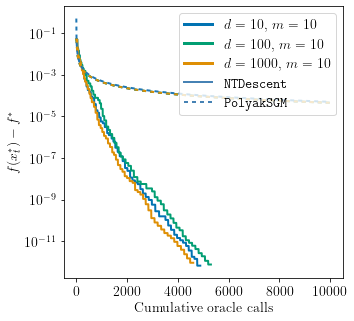

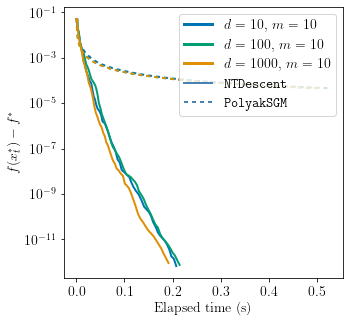

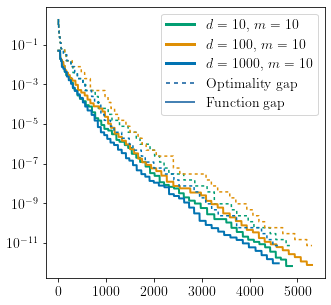

In [4]:
fig_oracle, ax_oracle, fig_time, ax_time, fig_stationary, ax_stationary = experiments_for_paper.nesterov_bad_function_ntd_vs_polyak_varying_dimension(max_oracle_call=10000)
fig_oracle.savefig("../figures/evil_functon_ntd_vs_polyak_varying_dimension.pdf", bbox_inches='tight')

## Evil function: Fixed $d$, varying $m$

Method: Polyak Number of oracle calls: 10000. Objective value: 4.49744148357939e-05
Method: Polyak Number of oracle calls: 20000. Objective value: 2.2493114921612323e-05
Method: Polyak Number of oracle calls: 30000. Objective value: 1.4996813016532329e-05
Method: Polyak Number of oracle calls: 40000. Objective value: 1.1248156679355414e-05
Method: Polyak Number of oracle calls: 50000. Objective value: 8.998795141351712e-06
Method: Polyak Number of oracle calls: 60000. Objective value: 7.499149034341512e-06
Method: Polyak Number of oracle calls: 70000. Objective value: 6.42793737355013e-06
Method: Polyak Number of oracle calls: 80000. Objective value: 5.624508678907236e-06
Method: Polyak Number of oracle calls: 90000. Objective value: 4.999607703080888e-06
Method: Polyak Number of oracle calls: 100000. Objective value: 4.4996792742807434e-06
Method: Polyak Number of oracle calls: 110000. Objective value: 4.090641811616003e-06
Method: Polyak Number of oracle calls: 120000. Objective valu

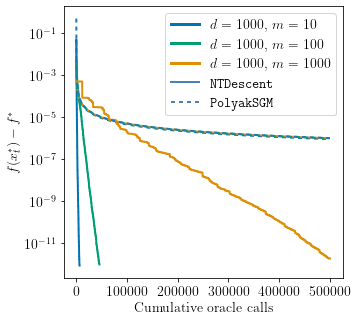

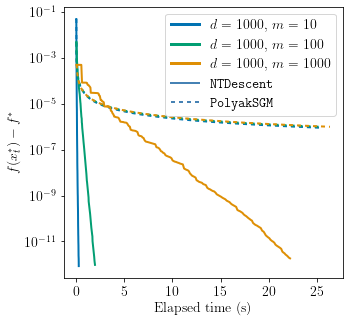

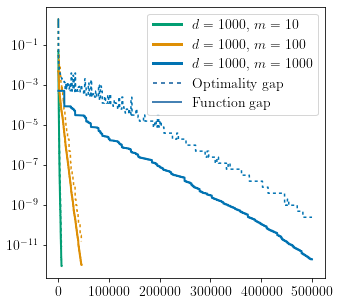

In [5]:
fig_oracle, ax_oracle, fig_time, ax_time, fig_stationary, ax_stationary = experiments_for_paper.nesterov_bad_function_ntd_vs_polyak_varying_m(max_oracle_call=500000)
fig_oracle.savefig("../figures/evil_functon_ntd_vs_polyak_varying_m.pdf", bbox_inches='tight')

# Max-of-smooth Quadratics
In this example, $f$ takes the following form
\begin{align}
f(x) = \max_{i=1,\ldots, m}\left\{ g_i^\top x + \frac{1}{2} x^T H_i x\right\},
\end{align}
where
- we generate a random vector $\lambda \in \mathbb{R}^m$ in $\{\lambda>0 \colon \sum_{i=1}^{m}\lambda_i=0\}$, a random positive semi-definite matrix $H_i$, and a random vector $g_i$ satisfying that $\sum_{i=1}^{m}\lambda_i g_i = 0$.
- The optimal value of $f$ is $0$.

## Max-of-smooth Quadratics: Fixed $m$, varying $d$

Method: Polyak Number of oracle calls: 10000. Objective value: 9.572757270695849e-05
Method: Polyak Number of oracle calls: 20000. Objective value: 4.355166017728575e-05
Method: Polyak Number of oracle calls: 30000. Objective value: 4.015173257171716e-05
Method: Polyak Number of oracle calls: 40000. Objective value: 2.4215318704263224e-05
Objective tolerance reached
Method: Polyak Number of oracle calls: 10000. Objective value: 0.0001995158623498343
Method: Polyak Number of oracle calls: 20000. Objective value: 0.00010271472177507362
Method: Polyak Number of oracle calls: 30000. Objective value: 6.955265367821975e-05
Method: Polyak Number of oracle calls: 40000. Objective value: 5.271274761371033e-05
Objective tolerance reached
Method: Polyak Number of oracle calls: 10000. Objective value: 0.00017381968214579848
Method: Polyak Number of oracle calls: 20000. Objective value: 8.999051611275428e-05
Method: Polyak Number of oracle calls: 30000. Objective value: 6.11056097816094e-05
Method:

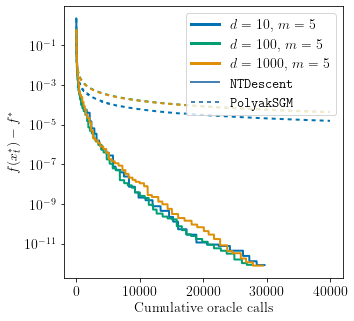

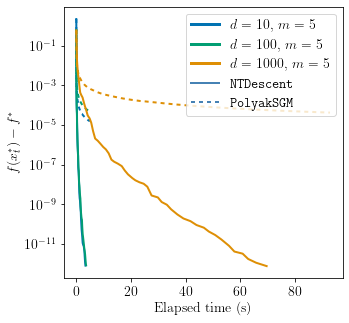

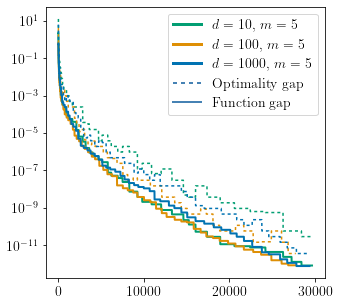

In [7]:
fig_oracle, ax_oracle, fig_time, ax_time, fig_stationary, ax_stationary = experiments_for_paper.max_of_smooth_random_ntd_vs_polyak_varying_dimension(max_oracle_call=40000)
fig_oracle.savefig("../figures/max_of_smooth_ntd_vs_polyak_varying_dimension.pdf", bbox_inches='tight')

## Max-of-smooth Quadratics: Fixed $d$, varying $m$

Method: Polyak Number of oracle calls: 10000. Objective value: 0.0003160204317289668
Method: Polyak Number of oracle calls: 20000. Objective value: 0.0001625541420273063
Method: Polyak Number of oracle calls: 30000. Objective value: 0.00010992132062228913
Method: Polyak Number of oracle calls: 40000. Objective value: 8.320680909201461e-05
Method: Polyak Number of oracle calls: 50000. Objective value: 6.701672702132127e-05
Method: Polyak Number of oracle calls: 60000. Objective value: 5.614284738014906e-05
Method: Polyak Number of oracle calls: 70000. Objective value: 4.833014650520153e-05
Method: Polyak Number of oracle calls: 80000. Objective value: 4.244236180211314e-05
Method: Polyak Number of oracle calls: 90000. Objective value: 3.7844320183528696e-05
Method: Polyak Number of oracle calls: 100000. Objective value: 3.415295698511902e-05
Method: Polyak Number of oracle calls: 110000. Objective value: 3.112343593222053e-05
Method: Polyak Number of oracle calls: 120000. Objective valu

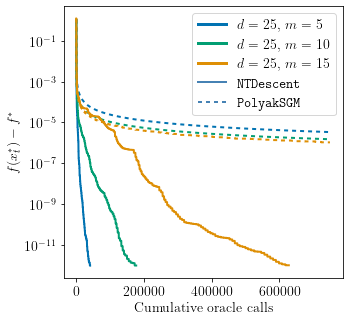

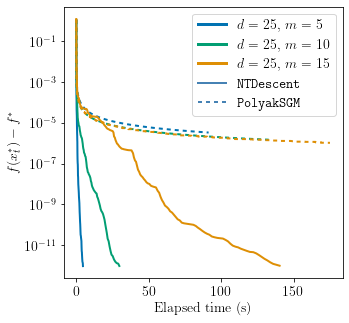

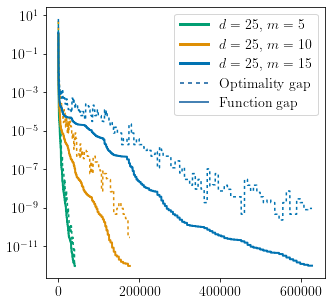

In [8]:
fig_oracle, ax_oracle, fig_time, ax_time, fig_stationary, ax_stationary = experiments_for_paper.max_of_smooth_random_ntd_vs_polyak_varying_nb_function(max_oracle_call=750000)
fig_oracle.savefig("../figures/max_of_smooth_ntd_vs_polyak_varying_m.pdf", bbox_inches='tight')

## Max-of-smooth Quadratics: Fixed $d$, fixed $m$, varying init scale in $\{1, 10, 100\}$.

Method: Polyak Number of oracle calls: 10000. Objective value: 0.0001995158623498343
Method: Polyak Number of oracle calls: 20000. Objective value: 0.00010271472177507362
Method: Polyak Number of oracle calls: 30000. Objective value: 6.955265367821975e-05
Method: Polyak Number of oracle calls: 40000. Objective value: 5.271274761371033e-05
Method: Polyak Number of oracle calls: 50000. Objective value: 4.249964801423939e-05
Method: Polyak Number of oracle calls: 60000. Objective value: 3.5635038046898924e-05
Method: Polyak Number of oracle calls: 70000. Objective value: 3.069946508386217e-05
Objective tolerance reached
Method: Polyak Number of oracle calls: 10000. Objective value: 0.0002082580592308542
Method: Polyak Number of oracle calls: 20000. Objective value: 0.00010562229473213278
Method: Polyak Number of oracle calls: 30000. Objective value: 7.097632687646942e-05
Method: Polyak Number of oracle calls: 40000. Objective value: 5.352348295311128e-05
Method: Polyak Number of oracle ca

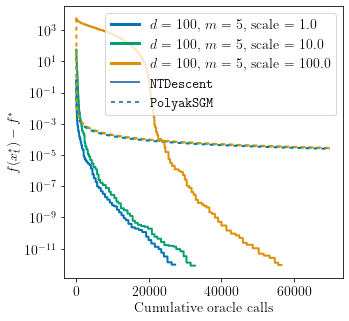

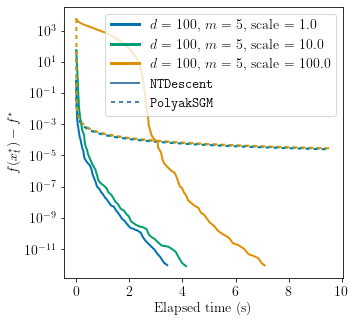

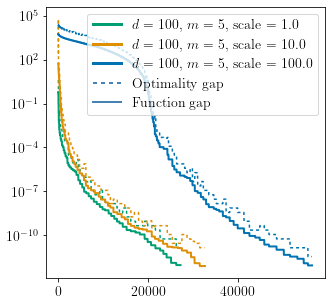

In [9]:
fig_oracle, ax_oracle, fig_time, ax_time, fig_stationary, ax_stationary = experiments_for_paper.max_of_smooth_random_ntd_vs_polyak_varying_init(max_oracle_call=70000)
fig_oracle.savefig("../figures/max_of_smooth_ntd_vs_polyak_varying_init.pdf", bbox_inches='tight')

## Max-of-smooth Quadratics: Fixed $m$ and init scale 100, but varying $d$ and adaptive grid scale.


Method: Polyak Number of oracle calls: 10000. Objective value: 0.00015694426377324818
Method: Polyak Number of oracle calls: 20000. Objective value: 3.0423363145319052e-05
Method: Polyak Number of oracle calls: 30000. Objective value: 3.149427046715511e-05
Method: Polyak Number of oracle calls: 40000. Objective value: 1.9680453873795462e-05
Method: Polyak Number of oracle calls: 50000. Objective value: 1.873221627940409e-05
Method: Polyak Number of oracle calls: 60000. Objective value: 1.1487404221563975e-05
Method: Polyak Number of oracle calls: 70000. Objective value: 1.155375258968274e-05
Objective tolerance reached
Method: Polyak Number of oracle calls: 10000. Objective value: 0.00022502838384680647
Method: Polyak Number of oracle calls: 20000. Objective value: 0.00011342437515056075
Method: Polyak Number of oracle calls: 30000. Objective value: 7.596405456984825e-05
Method: Polyak Number of oracle calls: 40000. Objective value: 5.715479232431981e-05
Method: Polyak Number of oracle

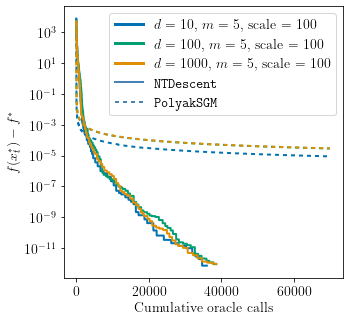

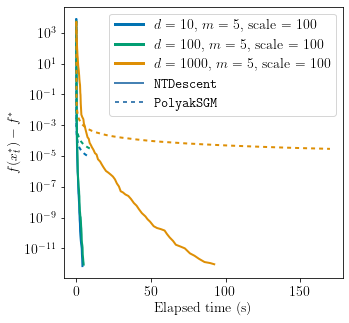

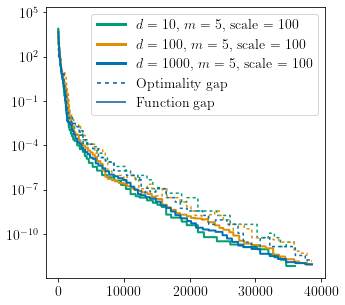

In [10]:
fig_oracle, ax_oracle, fig_time, ax_time, fig_stationary, ax_stationary = experiments_for_paper.max_of_smooth_random_ntd_vs_polyak_large_init_adaptive_grid(max_oracle_call=70000)
fig_oracle.savefig("../figures/max_of_smooth_ntd_vs_polyak_adaptive_grid.pdf", bbox_inches='tight')

# Quadratic sensing problem:
In this example, $f$ takes the form:
$$
f(X) = \frac{1}{2n}\|\mathcal{A}(XX^T - M_\star)\|_1.
$$
where
- $X$ is a $N\times m$ matrix; here $d = Nm$.
- $M_\star$ is a rank $m_\star$ matrix.
- $\mathcal{A}$ is a linear mapping on $N\times N$ matrices of the form $Y \mapsto (a_i^TY a_i)_{i=1}^n - (b_i^TY b_i)$ for $a_i$ and $b_i$ sampled from a standard multivariate normal distribution.
- $n = 4Nr$

## Quadratic sensing: $r \in \{r_\star,r_\star + 5, r_\star+10\}$

Objective tolerance reached
Objective tolerance reached
Method: Polyak Number of oracle calls: 10000. Objective value: 8.076955004763905e-05
Method: Polyak Number of oracle calls: 20000. Objective value: 4.253967255714033e-05
Method: Polyak Number of oracle calls: 30000. Objective value: 2.653952644329574e-05
Method: Polyak Number of oracle calls: 40000. Objective value: 2.13171956136689e-05
Method: Polyak Number of oracle calls: 50000. Objective value: 1.6858034647527123e-05
Objective tolerance reached
Method: Polyak Number of oracle calls: 10000. Objective value: 0.00016060089018082836
Method: Polyak Number of oracle calls: 20000. Objective value: 7.838731130268881e-05
Method: Polyak Number of oracle calls: 30000. Objective value: 5.279635933961679e-05
Method: Polyak Number of oracle calls: 40000. Objective value: 4.277329532943934e-05
Method: Polyak Number of oracle calls: 50000. Objective value: 3.4323450410151026e-05


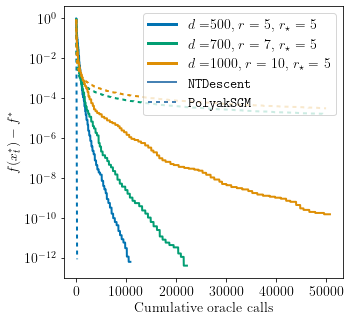

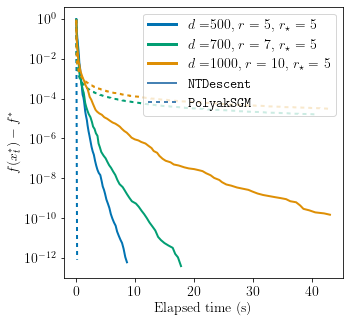

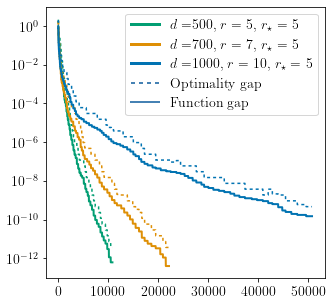

In [12]:
fig_oracle, ax_oracle, fig_time, ax_time, fig_stationary, ax_stationary = experiments_for_paper.quadratic_sensing_ntd_vs_polyak_varying_overparameterization(max_oracle_call=50000, base_dimension=100)
fig_oracle.savefig("../figures/overparameterized_varying.pdf", bbox_inches='tight')

## Quadratic sensing: fixed $d$, varying $r_\star$, $r = r_\star + 5$

Method: Polyak Number of oracle calls: 10000. Objective value: 0.00016060089018082836
Method: Polyak Number of oracle calls: 20000. Objective value: 7.838731130268881e-05
Method: Polyak Number of oracle calls: 30000. Objective value: 5.279635933961679e-05
Method: Polyak Number of oracle calls: 40000. Objective value: 4.277329532943934e-05
Method: Polyak Number of oracle calls: 50000. Objective value: 3.4323450410151026e-05
Method: Polyak Number of oracle calls: 10000. Objective value: 6.518396415113582e-05
Method: Polyak Number of oracle calls: 20000. Objective value: 3.306726966455631e-05
Method: Polyak Number of oracle calls: 30000. Objective value: 2.2129951661667097e-05
Method: Polyak Number of oracle calls: 40000. Objective value: 1.6780711703816488e-05
Method: Polyak Number of oracle calls: 50000. Objective value: 1.2657799610255636e-05
Objective tolerance reached
Method: Polyak Number of oracle calls: 10000. Objective value: 4.284372145509863e-05
Method: Polyak Number of oracle 

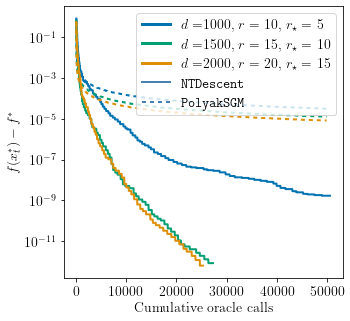

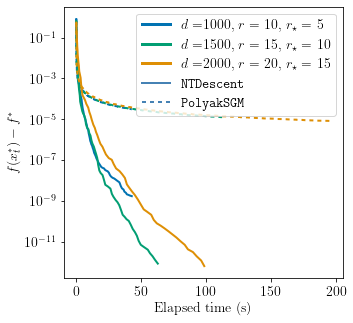

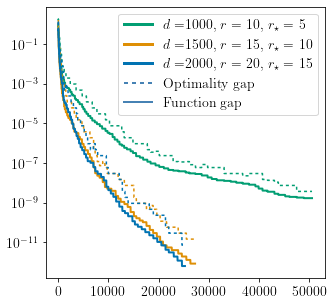

In [13]:
fig_oracle, ax_oracle, fig_time, ax_time, fig_stationary, ax_stationary = experiments_for_paper.quadratic_sensing_ntd_vs_polyak_fixed_overparameterization_and_dimension_varying_rank(max_oracle_call=50000, base_dimension=100)
fig_oracle.savefig("../figures/overparameterization_rank_varying_dimension_fixed.pdf", bbox_inches='tight')

# Loss function: "Eigenvalue Product" (adapted from [Lewis and Overton, section 5.9](https://cs.nyu.edu/~overton/papers/pdffiles/bfgs_inexactLS.pdf))

$$F(V) = \prod_{i=1}^K \lambda_i(A \odot (c(V) c(V)^T)) \qquad \text{for all $V \in \mathbb{R}^{N \times N}$}.$$
Where:
- Mapping $c$ satisfies $c(V) = \text{Diag}(\text{diag}(VV^T)^{-1/2})V.$
- Matrix $A \in \mathbb{R}^{N \times N}$ is known, described in paper.

In this problem, the optimal value is unknown. NTD does not need to know the optimal value, but Polyak requires it. Thus, we will first run NTD for a long time to get an estimate of the optimal value.

In [ ]:
N = 14 # max 63
K = 7 # max 63
max_oracle_call = 1000000
max_time_seconds= 100000
print_frequency = 10
param, loss_function, flags = examples.eigenvalue_product(nb_eigenvalues=K, dimension=N)
utils.run_ntd_and_plot(param,
                          loss_function,
                          verbose=True,
                          max_oracle_call=max_oracle_call,
                          max_time_seconds=max_time_seconds,
                          print_frequency=print_frequency,
                          flags=flags)
final_loss = loss_function().item()

## Eigenvalue Product part II: NTD vs Polyak
In previous cell, we estimated the optimal value -- "final_loss" -- of $f$. Now we run the Polyak subgradient method with this estimate of $\inf f$ and compare with NTD.

Objective tolerance reached
Method: Polyak Number of oracle calls: 10000. Objective value: 0.0001922149730479994
Method: Polyak Number of oracle calls: 20000. Objective value: 0.0001143356645925131
Method: Polyak Number of oracle calls: 30000. Objective value: 7.990674798064035e-05
Method: Polyak Number of oracle calls: 40000. Objective value: 5.947687680274427e-05
Method: Polyak Number of oracle calls: 50000. Objective value: 5.51510128317112e-05
Method: Polyak Number of oracle calls: 60000. Objective value: 5.033051422742574e-05
Method: Polyak Number of oracle calls: 70000. Objective value: 3.771334868751808e-05
Method: Polyak Number of oracle calls: 80000. Objective value: 3.141769037773301e-05
Method: Polyak Number of oracle calls: 90000. Objective value: 2.8869237956641314e-05
Method: Polyak Number of oracle calls: 100000. Objective value: 2.9082062726004665e-05
Method: Polyak Number of oracle calls: 110000. Objective value: 2.4336895521948065e-05
Method: Polyak Number of oracle c

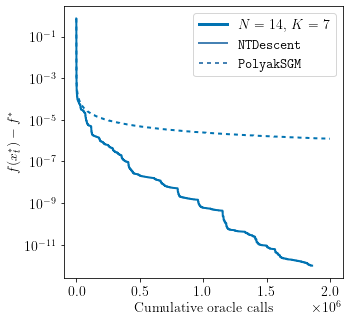

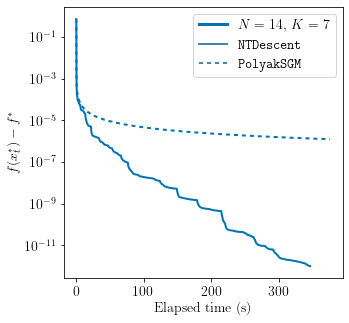

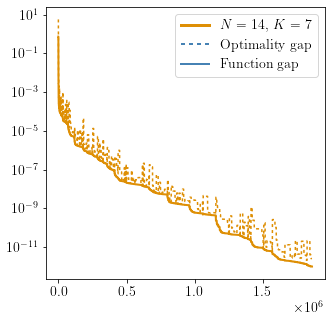

In [14]:
N = 14 # max 63
K = 7 # max 63
final_loss = -2.52446755205288
max_oracle_call = 2000000
max_time_seconds= 10000000
print_frequency = 10000
param, loss_function, flags = examples.eigenvalue_product(nb_eigenvalues=K, dimension=N, opt_val=final_loss)
flags['params_for_legend'] = r"$N =$ " + str(N) + r", $K =$ " + str(K)
fig_oracle, ax_oracle, fig_time, ax_time, fig_stat, ax_stat = utils.compare_ntd_and_polyak_and_plot(param,
                          loss_function=loss_function,
                          verbose=True,
                          max_oracle_call=max_oracle_call,
                          max_time_seconds=max_time_seconds,
                          print_frequency=print_frequency,
                          flags=flags,
                          obj_tol=1e-12,
                          opt_value=0.0)
fig_oracle.savefig("../figures/eigenvalue_prod.pdf", bbox_inches='tight')
fig_stat.savefig("../figures/eigenvalue_prod_stationary.pdf", bbox_inches='tight')